## Case Study 1(Cervical Cancer Risk Classification)    
    
   
    Age
    Number of sexual partners
    First sexual intercourse
    Num of pregnancies
    Smokes
    Smokes (years)
    Smokes (packs/year)
    Hormonal Contraceptives
    Hormonal Contraceptives (years)
    IUD
    IUD (years)
    STDs
    STDs (number)
    STDs:condylomatosis
    STDs:cervical condylomatosis
    STDs:vaginal condylomatosis
    STDs:vulvo-perineal condylomatosis
    STDs:syphilis
    STDs:pelvic inflammatory disease
    STDs:genital herpes
    STDs:molluscum contagiosum
    STDs:AIDS
    STDs:HIV
    STDs:Hepatitis B
    STDs:HPV
    STDs: Number of diagnosis
    STDs: Time since first diagnosis
    STDs: Time since last diagnosis
    Dx:Cancer
    Dx:CIN
    Dx:HPV
    Dx
    Hinselmann
    Schiller
    Citology
    Biopsy

### 1.1 import some necessary librairies

In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

### 1.2 import and put the train and test datasets in  pandas dataframe

In [2]:
data = pd.read_csv('cervicalcancer-original+dataset.csv')

### 1.3 check the data.describe()

In [3]:
data.describe()

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 1.4 Replacing ;?' with null values in each column?


In [4]:
data.replace('?',np.nan,inplace=True)

### 1.5 Check count of 0 means not cancer affected and 1 means cancer affected cell


In [5]:
data['Biopsy'].value_counts()

0    803
1     55
Name: Biopsy, dtype: int64

observation:
   


- most of the patients in the dataset are not cancer affected

### 1.6 Check Correlation Plot. And your observations?

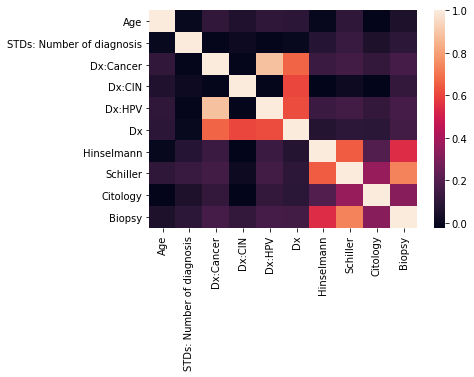

In [6]:
# correlation plot
sns.heatmap(data.corr())
plt.show()

#### observation:
    

- Biopsy is moderatley correlated with 'Hinselmann' but more correlated with 'Schiller'
- 'Dx' is moderately correlated with 'Dx:Cancer', 'Dx:CIN' and 'Dx:HPV'
- 'Dx:HPV' and 'Dx:Cancer' are highly correlated

### 1.6a) list the heatmap of top correlation


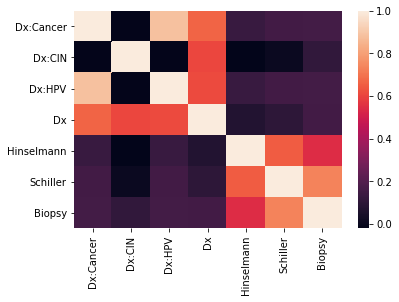

In [7]:
# list the heatmap of top correlation

# number of variables for heatmap
corr_col = ['Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller', 'Biopsy']
sns.heatmap(data[corr_col].corr())
plt.show()

#### observation:
    

### 1.7 Imputing the missing values from the given dataset?

In [8]:
# we will impute the categorical variables with 0 or 1 and continuous variables with median value
data['Number of sexual partners'].fillna(data['Number of sexual partners'].median(),inplace=True)

In [9]:
# Imputing the missing values from First sexual intercourse
data['First sexual intercourse'].fillna(data['First sexual intercourse'].median(),inplace=True)

In [10]:
# Imputing the missing values from Num of pregnancies
data['Num of pregnancies'].fillna(data['Num of pregnancies'].median(),inplace=True)

In [11]:
# Imputing the missing values from Smokes
data['Smokes'].fillna(data['Smokes'].mode()[0],inplace=True)

In [12]:
# Imputing the missing values from Smokes (years)
data['Smokes (years)'].fillna(data['Smokes (years)'].median(),inplace=True)

In [13]:
# Imputing the missing values from Smokes (packs/year)
data['Smokes (packs/year)'].fillna(data['Smokes (packs/year)'].median(),inplace=True)

In [14]:
# Imputing the missing values from Hormonal Contraceptives
data['Hormonal Contraceptives'].fillna(data['Hormonal Contraceptives'].mode()[0],inplace=True)

In [15]:
# Imputing the missing values from Hormonal Contraceptives (years)
data['Hormonal Contraceptives (years)'].fillna(data['Hormonal Contraceptives (years)'].median(),inplace=True)

In [16]:
# Imputing the missing values from IUD
data['IUD'].fillna(data['IUD'].mode()[0],inplace=True)

In [17]:
# Imputing the missing values from IUD (years)
data['IUD (years)'].fillna(data['IUD (years)'].median(),inplace=True)

In [18]:
# Imputing the missing values from STDs
data['STDs'].fillna(data['STDs'].mode()[0],inplace=True)

In [19]:
# Imputing the missing values from STDs (number)
data['STDs (number)'].fillna(data['STDs (number)'].median(),inplace=True)

In [20]:
# Imputing the missing values from STDs:condylomatosis
data['STDs:condylomatosis'].fillna(data['STDs:condylomatosis'].mode()[0],inplace=True)

In [21]:
# Imputing the missing values from STDs:cervical condylomatosis
data['STDs:cervical condylomatosis'].fillna(data['STDs:cervical condylomatosis'].mode()[0],inplace=True)

In [22]:
# Imputing the missing values from STDs:vaginal condylomatosis
data['STDs:vaginal condylomatosis'].fillna(data['STDs:vaginal condylomatosis'].mode()[0],inplace=True)

In [23]:
# Imputing the missing values from STDs:vulvo-perineal condylomatosis
data['STDs:vulvo-perineal condylomatosis'].fillna(data['STDs:vulvo-perineal condylomatosis'].mode()[0],inplace=True)

In [24]:
# Imputing the missing values from STDs:syphilis
data['STDs:syphilis'].fillna(data['STDs:syphilis'].mode()[0],inplace=True)

In [25]:
# Imputing the missing values from STDs:pelvic inflammatory diseases
data['STDs:pelvic inflammatory disease'].fillna(data['STDs:pelvic inflammatory disease'].mode()[0],inplace=True)

In [26]:
# Imputing the missing values from STDs:genital herpes
data['STDs:genital herpes'].fillna(data['STDs:genital herpes'].mode()[0],inplace=True)

In [27]:
# Imputing the missing values from STDs:molluscum contagiosum
data['STDs:molluscum contagiosum'].fillna(data['STDs:molluscum contagiosum'].mode()[0],inplace=True)

In [28]:
# Imputing the missing values from STDs:AIDS
data['STDs:AIDS'].fillna(data['STDs:AIDS'].mode()[0],inplace=True)

In [29]:
# Imputing the missing values from STDs:HIV
data['STDs:HIV'].fillna(data['STDs:HIV'].mode()[0],inplace=True)

In [30]:
# Imputing the missing values from STDs:Hepatitis B
data['STDs:Hepatitis B'].fillna(data['STDs:Hepatitis B'].mode()[0],inplace=True)

In [31]:
# Imputing the missing values from STDs:HPV
data['STDs:HPV'].fillna(data['STDs:HPV'].mode()[0],inplace=True)

In [32]:
# Imputing the missing values from STDs: Time since first diagnosis
data['STDs: Time since first diagnosis'].fillna(data['STDs: Time since first diagnosis'].median(),inplace=True)

In [33]:
# Imputing the missing values from STDs: Time since last diagnosis
data['STDs: Time since last diagnosis'].fillna(data['STDs: Time since last diagnosis'].median(),inplace=True)

###  1.8 Imputing null values for categorical variables for get_dummies

### 1.10 Data Visualization for checking any categorical variables or not using count plot?

### 1.11 splitting the dataset into dependent and independent variables?

### 1.12 splitting the dataset into  training and test set?

# The End